<a href="https://colab.research.google.com/github/duneag2/Old/blob/main/5.%20stock%20market%20prediction%20using%20rnn%20and%20lstm_batch_size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

In [ ]:
import os
import pickle
import quandl
import numpy as np


def date_obj_to_str(date_obj):
    return date_obj.strftime('%Y-%m-%d')


def save_pickle(something, path):
    if not os.path.exists(os.path.dirname(path)):
        os.makedirs(os.path.dirname(path))
    with open(path, 'wb') as fh:
        pickle.dump(something, fh, pickle.DEFAULT_PROTOCOL)


def load_pickle(path):
    with open(path, 'rb') as fh:
        return pickle.load(fh)


def fetch_stock_price(symbol,
                      from_date,
                      to_date,
                      cache_path="./tmp/prices/"):
    assert(from_date <= to_date)

    filename = "{}_{}_{}.pk".format(symbol, str(from_date), str(to_date))
    price_filepath = os.path.join(cache_path, filename)

    try:
        prices = load_pickle(price_filepath)
        print("loaded from", price_filepath)

    except IOError:
        historic = quandl.get("WIKI/" + symbol,
                              start_date=date_obj_to_str(from_date),
                              end_date=date_obj_to_str(to_date))

        prices = historic["Adj. Close"].tolist()
        save_pickle(prices, price_filepath)
        print("saved into", price_filepath)

    return prices


def fetch_cosine_values(seq_len, frequency=0.01, noise=0.1):
    np.random.seed(101)
    x = np.arange(0.0, seq_len, 1.0)
    return np.cos(2 * np.pi * frequency * x) + np.random.uniform(low=-noise, high=noise, size=seq_len)


def format_dataset(values, temporal_features):
    feat_splits = [values[i:i + temporal_features] for i in range(len(values) - temporal_features)]
    feats = np.vstack(feat_splits)
    labels = np.array(values[temporal_features:])
    return feats, labels


def matrix_to_array(m):
    return np.asarray(m).reshape(-1)


if __name__ == "__main__":
    print(fetch_cosine_values(10, frequency=0.1))
    import datetime
    print(fetch_stock_price("GOOG", datetime.date(2017, 1, 1), datetime.date(2017, 1, 31)))

[ 1.00327973  0.82315051  0.21471184 -0.37471266 -0.7719616  -0.93322063
 -0.84762375 -0.23029438  0.35332577  0.74700479]
saved into ./tmp/prices/GOOG_2017-01-01_2017-01-31.pk
[786.14, 786.9, 794.02, 806.15, 806.65, 804.79, 807.91, 806.36, 807.88, 804.61, 806.07, 802.175, 805.02, 819.31, 823.87, 835.67, 832.15, 823.31, 802.32, 796.79]


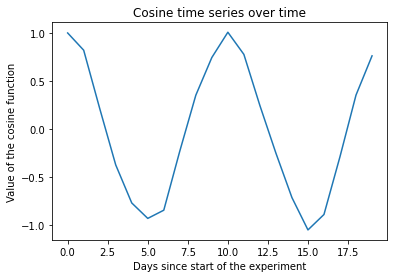

minibatch_cos_X.shape= (15, 5)
minibatch_cos_y.shape= (15,)
Observation 0: X=[ 1.    0.82  0.21 -0.37 -0.77] y=-0.9332206274727847
Observation 1: X=[ 0.82  0.21 -0.37 -0.77 -0.93] y=-0.8476237504405
Observation 2: X=[ 0.21 -0.37 -0.77 -0.93 -0.85] y=-0.23029437843826808
Observation 3: X=[-0.37 -0.77 -0.93 -0.85 -0.23] y=0.35332576672860816
Observation 4: X=[-0.77 -0.93 -0.85 -0.23  0.35] y=0.7470047852159067


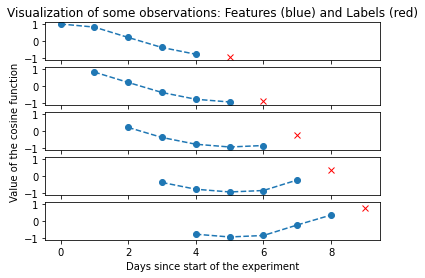

saved into ./tmp/prices/MSFT_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/KO_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AAL_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/MMM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/AXP_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GE_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/GM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/JPM_2015-01-01_2016-12-31.pk
saved into ./tmp/prices/UPS_2015-01-01_2016-12-31.pk


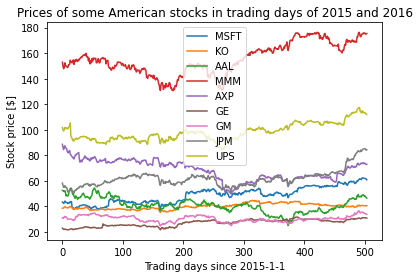

In [ ]:
# Visualize the data and the
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn

np.set_printoptions(precision=2)

# # Print 2 oscillations (20 points, with a frequency of 0.1, i.e. a period of 10)
cos_values = fetch_cosine_values(20, frequency=0.1)
seaborn.lineplot(data = cos_values)
plt.xlabel("Days since start of the experiment")
plt.ylabel("Value of the cosine function")
plt.title("Cosine time series over time")
plt.show()

# Format the feature and label set
features_size = 5
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, features_size)
print("minibatch_cos_X.shape=", minibatch_cos_X.shape)
print("minibatch_cos_y.shape=", minibatch_cos_y.shape)

# Print some features of the experiment
samples_to_plot = 5
f, axarr = plt.subplots(samples_to_plot, sharex=True)
for i in range(samples_to_plot):
    feats = minibatch_cos_X[i, :]
    label = minibatch_cos_y[i]

    print("Observation {}: X={} y={}".format(
        i, feats, label
    ))
    # plt.subplot(samples_to_plot, 1, i+1)
    axarr[i].plot(range(i, features_size + i), feats, '--o')
    axarr[i].plot([features_size + i], label, 'rx')
    axarr[i].set_ylim([-1.1, 1.1])

plt.xlabel("Days since start of the experiment")
axarr[2].set_ylabel("Value of the cosine function")
axarr[0].set_title("Visualization of some observations: Features (blue) and Labels (red)")
plt.show()

# Print the stock price of 2015 and 2016 for some stocks
symbols = ["MSFT", "KO", "AAL", "MMM", "AXP", "GE", "GM", "JPM", "UPS"]
ax = plt.subplot(1,1,1)
for sym in symbols:
    prices = fetch_stock_price(
        sym, datetime.date(2015, 1, 1), datetime.date(2016, 12, 31))
    ax.plot(range(len(prices)), prices, label=sym)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
plt.xlabel("Trading days since 2015-1-1")
plt.ylabel("Stock price [$]")
plt.title("Prices of some American stocks in trading days of 2015 and 2016")
plt.show()

In [ ]:
import numpy as np
from matplotlib import pylab as plt

def evaluate_ts(features, y_true, y_pred):
    print("Evaluation of the predictions:")
    print("MSE:", np.mean(np.square(y_true - y_pred)))
    print("mae:", np.mean(np.abs(y_true - y_pred)))

    print("Benchmark: if prediction == last feature")
    print("MSE:", np.mean(np.square(features[:, -1] - y_true)))
    print("mae:", np.mean(np.abs(features[:, -1] - y_true)))


    plt.plot(matrix_to_array(y_true), 'b')
    plt.plot(matrix_to_array(y_pred), 'r--')
    plt.xlabel("Days")
    plt.ylabel("Predicted and true values")
    plt.title("Predicted (Red) VS Real (Blue)")
    plt.show()

    error = np.abs(matrix_to_array(y_pred) - matrix_to_array(y_true))
    plt.plot(error, 'r')
    fit = np.polyfit(range(len(error)), error, deg=1)
    plt.plot(fit[0] * range(len(error)) + fit[1], '--')
    plt.xlabel("Days")
    plt.ylabel("Prediction error L1 norm")
    plt.title("Prediction error (absolute) and trendline")
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.01

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tf.__version__

'2.6.0'

In [ ]:
# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

In [ ]:
train_X.shape

(250, 20)

In [ ]:
train_y.shape

(250, 1)

In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
train_X.shape

(250, 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=16)

Epoch 1/1000
16/16 [==============================] - 4s 25ms/step - loss: 0.2719 - mae: 0.4152
Epoch 2/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.0294 - mae: 0.1383
Epoch 3/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0130 - mae: 0.0925
Epoch 4/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0097 - mae: 0.0779
Epoch 5/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0090 - mae: 0.0753
Epoch 6/1000
16/16 [==============================] - 0s 22ms/step - loss: 0.0077 - mae: 0.0717
Epoch 7/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0079 - mae: 0.0724
Epoch 8/1000
16/16 [==============================] - 0s 26ms/step - loss: 0.0078 - mae: 0.0717
Epoch 9/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0079 - mae: 0.0738
Epoch 10/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.0075 - mae: 0.0706
Epoch 11/1000
16/16 [==================

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 5ms/step - loss: 0.0066 - mae: 0.0657
TEST SET PERFORMANCE
MSE:  0.006558333523571491
MAE:  0.06570757180452347


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.1

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.SimpleRNN(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데 왜 그런건가요...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=16)

Epoch 1/1000
16/16 [==============================] - 1s 24ms/step - loss: 0.1201 - mae: 0.2465
Epoch 2/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0189 - mae: 0.1091
Epoch 3/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0116 - mae: 0.0868
Epoch 4/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0102 - mae: 0.0833
Epoch 5/1000
16/16 [==============================] - 0s 27ms/step - loss: 0.0104 - mae: 0.0847
Epoch 6/1000
16/16 [==============================] - 0s 23ms/step - loss: 0.0094 - mae: 0.0770
Epoch 7/1000
16/16 [==============================] - 0s 25ms/step - loss: 0.0102 - mae: 0.0833
Epoch 8/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0116 - mae: 0.0864
Epoch 9/1000
16/16 [==============================] - 0s 26ms/step - loss: 0.0103 - mae: 0.0820
Epoch 10/1000
16/16 [==============================] - 0s 24ms/step - loss: 0.0093 - mae: 0.0773
Epoch 11/1000
16/16 [==================

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 5ms/step - loss: 0.0104 - mae: 0.0825
TEST SET PERFORMANCE
MSE:  0.010398236103355885
MAE:  0.08254949748516083


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.1

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.LSTM(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=16)

Epoch 1/1000
16/16 [==============================] - 1s 62ms/step - loss: 0.4931 - mae: 0.6252
Epoch 2/1000
16/16 [==============================] - 1s 65ms/step - loss: 0.4979 - mae: 0.6290
Epoch 3/1000
16/16 [==============================] - 1s 67ms/step - loss: 0.4901 - mae: 0.6209
Epoch 4/1000
16/16 [==============================] - 1s 62ms/step - loss: 0.4946 - mae: 0.6265
Epoch 5/1000
16/16 [==============================] - 1s 62ms/step - loss: 0.5006 - mae: 0.6315
Epoch 6/1000
16/16 [==============================] - 1s 64ms/step - loss: 0.4947 - mae: 0.6234
Epoch 7/1000
16/16 [==============================] - 1s 59ms/step - loss: 0.4892 - mae: 0.6222
Epoch 8/1000
16/16 [==============================] - 1s 60ms/step - loss: 0.4916 - mae: 0.6258
Epoch 9/1000
16/16 [==============================] - 1s 69ms/step - loss: 0.5081 - mae: 0.6304
Epoch 10/1000
16/16 [==============================] - 1s 63ms/step - loss: 0.4944 - mae: 0.6283
Epoch 11/1000
16/16 [==================

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 6ms/step - loss: 0.5230 - mae: 0.6462
TEST SET PERFORMANCE
MSE:  0.5229970812797546
MAE:  0.646234929561615


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.01

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.LSTM(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=16)

Epoch 1/1000
16/16 [==============================] - 2s 62ms/step - loss: 0.3821 - mae: 0.5242
Epoch 2/1000
16/16 [==============================] - 1s 58ms/step - loss: 0.1802 - mae: 0.3443
Epoch 3/1000
16/16 [==============================] - 1s 62ms/step - loss: 0.0594 - mae: 0.1742
Epoch 4/1000
16/16 [==============================] - 1s 58ms/step - loss: 0.0085 - mae: 0.0732
Epoch 5/1000
16/16 [==============================] - 1s 61ms/step - loss: 0.0058 - mae: 0.0635
Epoch 6/1000
16/16 [==============================] - 1s 57ms/step - loss: 0.0061 - mae: 0.0634
Epoch 7/1000
16/16 [==============================] - 1s 62ms/step - loss: 0.0060 - mae: 0.0644
Epoch 8/1000
16/16 [==============================] - 1s 66ms/step - loss: 0.0068 - mae: 0.0691
Epoch 9/1000
16/16 [==============================] - 1s 63ms/step - loss: 0.0060 - mae: 0.0632
Epoch 10/1000
16/16 [==============================] - 1s 57ms/step - loss: 0.0055 - mae: 0.0616
Epoch 11/1000
16/16 [==================

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 7ms/step - loss: 0.0054 - mae: 0.0605
TEST SET PERFORMANCE
MSE:  0.005393319297581911
MAE:  0.06049685925245285


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.01

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.LSTM(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=32)

Epoch 1/1000
8/8 [==============================] - 2s 61ms/step - loss: 0.4639 - mae: 0.5907
Epoch 2/1000
8/8 [==============================] - 1s 64ms/step - loss: 0.2887 - mae: 0.4537
Epoch 3/1000
8/8 [==============================] - 1s 67ms/step - loss: 0.2143 - mae: 0.3877
Epoch 4/1000
8/8 [==============================] - 1s 61ms/step - loss: 0.1602 - mae: 0.3258
Epoch 5/1000
8/8 [==============================] - 1s 65ms/step - loss: 0.1056 - mae: 0.2553
Epoch 6/1000
8/8 [==============================] - 1s 63ms/step - loss: 0.0478 - mae: 0.1680
Epoch 7/1000
8/8 [==============================] - 0s 61ms/step - loss: 0.0119 - mae: 0.0882
Epoch 8/1000
8/8 [==============================] - 1s 63ms/step - loss: 0.0098 - mae: 0.0779
Epoch 9/1000
8/8 [==============================] - 0s 61ms/step - loss: 0.0106 - mae: 0.0800
Epoch 10/1000
8/8 [==============================] - 1s 74ms/step - loss: 0.0064 - mae: 0.0656
Epoch 11/1000
8/8 [==============================] - 1s 68m

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 6ms/step - loss: 0.0053 - mae: 0.0607
TEST SET PERFORMANCE
MSE:  0.00525426072999835
MAE:  0.06074920669198036


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.01

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.LSTM(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=64)

Epoch 1/1000
4/4 [==============================] - 2s 70ms/step - loss: 0.5333 - mae: 0.6357
Epoch 2/1000
4/4 [==============================] - 0s 66ms/step - loss: 0.3648 - mae: 0.5195
Epoch 3/1000
4/4 [==============================] - 0s 67ms/step - loss: 0.3022 - mae: 0.4625
Epoch 4/1000
4/4 [==============================] - 0s 70ms/step - loss: 0.2557 - mae: 0.4196
Epoch 5/1000
4/4 [==============================] - 0s 60ms/step - loss: 0.2208 - mae: 0.3934
Epoch 6/1000
4/4 [==============================] - 0s 73ms/step - loss: 0.1916 - mae: 0.3599
Epoch 7/1000
4/4 [==============================] - 0s 61ms/step - loss: 0.1684 - mae: 0.3307
Epoch 8/1000
4/4 [==============================] - 0s 64ms/step - loss: 0.1435 - mae: 0.3001
Epoch 9/1000
4/4 [==============================] - 0s 65ms/step - loss: 0.1210 - mae: 0.2708
Epoch 10/1000
4/4 [==============================] - 0s 55ms/step - loss: 0.0969 - mae: 0.2342
Epoch 11/1000
4/4 [==============================] - 0s 61m

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 8ms/step - loss: 0.0043 - mae: 0.0556
TEST SET PERFORMANCE
MSE:  0.0043133883737027645
MAE:  0.05562516301870346


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.01

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.LSTM(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=128)

Epoch 1/1000
2/2 [==============================] - 2s 57ms/step - loss: 0.6056 - mae: 0.6901
Epoch 2/1000
2/2 [==============================] - 0s 77ms/step - loss: 0.4447 - mae: 0.5732
Epoch 3/1000
2/2 [==============================] - 0s 68ms/step - loss: 0.3990 - mae: 0.5566
Epoch 4/1000
2/2 [==============================] - 0s 63ms/step - loss: 0.3418 - mae: 0.5009
Epoch 5/1000
2/2 [==============================] - 0s 55ms/step - loss: 0.3148 - mae: 0.4743
Epoch 6/1000
2/2 [==============================] - 0s 83ms/step - loss: 0.2968 - mae: 0.4638
Epoch 7/1000
2/2 [==============================] - 0s 58ms/step - loss: 0.2729 - mae: 0.4432
Epoch 8/1000
2/2 [==============================] - 0s 61ms/step - loss: 0.2490 - mae: 0.4181
Epoch 9/1000
2/2 [==============================] - 0s 71ms/step - loss: 0.2288 - mae: 0.3985
Epoch 10/1000
2/2 [==============================] - 0s 71ms/step - loss: 0.2157 - mae: 0.3920
Epoch 11/1000
2/2 [==============================] - 0s 63m

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 6ms/step - loss: 0.0043 - mae: 0.0559
TEST SET PERFORMANCE
MSE:  0.004283188842236996
MAE:  0.05593035742640495


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

feat_dimension = 20
train_size = 250
test_size = 250
learning_rate = 0.01

tf.random.set_seed(101)

model = keras.Sequential()

model.add(layers.LSTM(units=10, 
                           activation='relu',
                           input_shape=[feat_dimension, 1])) # dimension을 3차원으로 설정하면 4차원이 되는데...

model.add(layers.Dense(1))

model.summary()

# 모델 학습과정 설정
model.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate),metrics=['mae'])
model.summary()

cos_values = fetch_cosine_values(train_size + test_size + feat_dimension)
minibatch_cos_X, minibatch_cos_y = format_dataset(cos_values, feat_dimension)

train_X = minibatch_cos_X[:train_size, :].astype(np.float32)
train_y = minibatch_cos_y[:train_size].reshape((-1, 1)).astype(np.float32)
test_X = minibatch_cos_X[train_size:, :].astype(np.float32)
test_y = minibatch_cos_y[train_size:].reshape((-1, 1)).astype(np.float32)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_X = train_X.reshape(train_X.shape[0], 20, 1)

In [ ]:
hist = model.fit(train_X, train_y, epochs=1000, batch_size=256)

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 0.6459 - mae: 0.7189
Epoch 2/1000
1/1 [==============================] - 0s 78ms/step - loss: 0.5584 - mae: 0.6625
Epoch 3/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.4779 - mae: 0.6020
Epoch 4/1000
1/1 [==============================] - 0s 59ms/step - loss: 0.4131 - mae: 0.5435
Epoch 5/1000
1/1 [==============================] - 0s 73ms/step - loss: 0.4064 - mae: 0.5605
Epoch 6/1000
1/1 [==============================] - 0s 65ms/step - loss: 0.3816 - mae: 0.5417
Epoch 7/1000
1/1 [==============================] - 0s 68ms/step - loss: 0.3491 - mae: 0.5066
Epoch 8/1000
1/1 [==============================] - 0s 74ms/step - loss: 0.3297 - mae: 0.4838
Epoch 9/1000
1/1 [==============================] - 0s 62ms/step - loss: 0.3182 - mae: 0.4758
Epoch 10/1000
1/1 [==============================] - 0s 70ms/step - loss: 0.3088 - mae: 0.4707
Epoch 11/1000
1/1 [==============================] - 0s 64ms/

In [ ]:
test_X = test_X.reshape(train_X.shape[0], 20, 1)

evaluation = model.evaluate(test_X,test_y)
print("TEST SET PERFORMANCE")
print("MSE: ",evaluation[0])
print("MAE: ",evaluation[1])

8/8 [==============================] - 0s 7ms/step - loss: 0.0046 - mae: 0.0571
TEST SET PERFORMANCE
MSE:  0.004637410864233971
MAE:  0.05705844238400459


questions:
1. train_X의 차원에 대해서 - reshape하는 기준 & 4차원 3차원.. 이게 구조가 어떻게 되는건지
2. want to know the mathematical reason that batch_size = 32&64 bring the optimal value; 숫자가 더 작거나 더 커지면 mse, mae 커짐
(128까지 optmize 되는 경우도 있음)